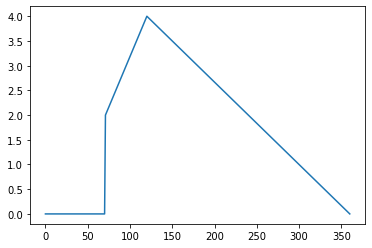

In [3]:
# https://ec.europa.eu/jrc/en/PVGIS/docs/noninteractive
# https://ec.europa.eu/jrc/en/PVGIS/releases/pvgis51
# https://re.jrc.ec.europa.eu/pvg_tools/es/#MR

from flask import Flask, jsonify, render_template, request, session
import pandas as pd # data wrangling
import requests as requests
import pandas as pd 
import json
import datetime
from math import pipk

import numpy as np
import matplotlib.pyplot as plt


# cuando se modifica un punto en el front
punto='0,12,42,8'

ppunto = pd.DataFrame([x.split(',') for x in punto.split('\n')])
ppunto=ppunto.astype(int)
# actualiza la tabla de puntos
df.at[(ppunto.at[0,0]*3+ppunto.at[0,1]+1),0]=ppunto.at[0,2]
df.at[(ppunto.at[0,0]*3+ppunto.at[0,1]+1),1]=ppunto.at[0,3]


# vvalores inciales

pp=[[-180,0],[-110,0],[-109,2],[-60,4],[180,0]]
# pp=[[-180,0],[-110,0],[-109,2],[-60,4],[-55,3],[-54,0],[-20,0],[-39,20],[0,22],[19,20],[20,0],[30,0],[31,5],[40,7],[60,2],[61,0],[180,0]]
df=pd.DataFrame(pp)



df[0]=df[0]+180
# df
# fig,ax=plt.subplots(figsize=(15,8))
# ax.plot(df[0],df[1])
# # .tolist()
# para crear los 360 puntos para el pvgis
d = pd.Series(np.nan, index=np.arange(360))

ii=df.index.tolist()
for i in ii: 
#     print(i) 
    d.at[df.at[i,0]]=df.at[i,1]
d=d.interpolate()
d=d.T
d.plot()


In [ ]:
# n [7]: a = np.random.choice([True, False], size=10000)
# In [8]: b = np.random.choice([True, False], size=10000)

# In [9]: %timeit a ^ b
# The slowest run took 7.61 times longer than the fastest. This could mean that an intermediate result is being cached
# 100000 loops, best of 3: 11 us per loop

# In [10]: %timeit np.logical_xor(a,b)
# The slowest run took 6.25 times longer than the fastest. This could mean that an intermediate result is being cached
# 100000 loops, best of 3: 11 us per loop


In [17]:
import numpy as np
import pandas as pd



df = pd.DataFrame( { 
"RecordID" : ["id1", "id2", "id3", "id4", "id5" , "id1", "id2", "id3", "id4", "id5" ] , 
"number_of_days" : [1,1,1,1,1,2,2,2,2,2]})


df = df.sort_values('RecordID')

arr = np.array_split(np.random.randint(1, 100, len(df)),
                     df.groupby('RecordID').size().cumsum()[:-1])

df['Random_Value'] = np.sort(arr, axis=1).ravel()
df

,RecordID,number_of_days,Random_Value
0,id1,1,18
5,id1,2,93
1,id2,1,65
6,id2,2,95
2,id3,1,32
7,id3,2,49
3,id4,1,29
8,id4,2,87
4,id5,1,18
9,id5,2,32


In [12]:
a

0     True
1    False
2    False
3     True
4    False
5     True
6     True
7    False
8    False
9     True
dtype: bool